## Load images and labels

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
train_images=train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
print(train_images.shape)
test_images=test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
print(train_images.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000, 784)
(60000, 784)


In [2]:
# normalize training img and test img
train_images_normalised = train_images/255.0
test_images_normalised = test_images/255.0

In [3]:
# Get the transpose of images and labels
train_img_tr = train_images_normalised.transpose()
test_img_tr = test_images_normalised.transpose()
train_label_tr = train_labels.reshape(1,train_labels.shape[0])
test_label_tr = test_labels.reshape(1,test_labels.shape[0])
print(train_img_tr.shape)
print(test_img_tr.shape)
print(train_label_tr.shape)
print(test_label_tr.shape)

(784, 60000)
(784, 10000)
(1, 60000)
(1, 10000)


In [4]:
dim_train = train_img_tr.shape[1]
dim_test = test_img_tr.shape[1]
print("The training dataset has dimensions equal to", dim_train)
print("The test set has dimensions equal to", dim_test)

The training dataset has dimensions equal to 60000
The test set has dimensions equal to 10000


## Change the labels for each digit

In [5]:
def shifted_label(label,target):
    label_copy=label.copy()
    for i in range (0,label.shape[1]):
        if label[0][i]==target:
            label_copy[0][i]=1
        else:
            label_copy[0][i]=0
    return label_copy

In [6]:
train_label_shifted_9 = train_label_tr//9
test_label_shifted_9 = test_label_tr//9
train_label_shifted_8 = shifted_label(train_label_tr,8)
test_label_shifted_8 = shifted_label(test_label_tr,8)
train_label_shifted_7 = shifted_label(train_label_tr,7)
test_label_shifted_7 = shifted_label(test_label_tr,7)
train_label_shifted_6 = shifted_label(train_label_tr,6)
test_label_shifted_6 = shifted_label(test_label_tr,6)
train_label_shifted_5 = shifted_label(train_label_tr,5)
test_label_shifted_5 = shifted_label(test_label_tr,5)
train_label_shifted_4 = shifted_label(train_label_tr,4)
test_label_shifted_4 = shifted_label(test_label_tr,4)
train_label_shifted_3 = shifted_label(train_label_tr,3)
test_label_shifted_3 = shifted_label(test_label_tr,3)
train_label_shifted_2 = shifted_label(train_label_tr,2)
test_label_shifted_2 = shifted_label(test_label_tr,2)
train_label_shifted_1 = shifted_label(train_label_tr,1)
test_label_shifted_1 = shifted_label(test_label_tr,1)
train_label_shifted_0 = shifted_label(train_label_tr,0)
test_label_shifted_0 = shifted_label(test_label_tr,0)

print("o:",train_label_tr[0][5:30])
print("9:",train_label_shifted_9[0][5:30])
print("8:",train_label_shifted_8[0][5:30])
print("7:",train_label_shifted_7[0][5:30])
print("6:",train_label_shifted_6[0][5:30])
print("5:",train_label_shifted_5[0][5:30])
print("4:",train_label_shifted_4[0][5:30])
print("3:",train_label_shifted_3[0][5:30])
print("2:",train_label_shifted_2[0][5:30])
print("1:",train_label_shifted_1[0][5:30])
print("0:",train_label_shifted_0[0][5:30])


o: [2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
9: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
8: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
7: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
6: [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
5: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
4: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
3: [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
2: [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0]
1: [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
0: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [7]:
#sigmoid activation
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [8]:
# initialize weight and bias
def initialize(dim):
    #w = np.zeros((dim,1))
    w= np.random.rand(dim,1)*0.1
    b = 0   
    # assert (w.shape == (dim,1))
    # assert (isinstance(b, float) or isinstance(b,int))
    return w,b

In [9]:
# propagate
def propagate(w, b, X, Y):
   
    m = X.shape[1]
    
    z = np.dot(w.T,X)+b#prediction Y^
    A = sigmoid(z)
    cost = 1.0/m*0.5*np.dot((A-Y),(A-Y).T)
    
    dw=1.0/m* np.dot(X,(np.dot((A-Y),A.T)*(1-A)).T)
    db=1.0/m*np.sum(np.dot(np.dot((A-Y),A.T),(1-A)))
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)
    assert (cost.shape == ())
    
    grads = {"dw": dw, 
             "db":db}
    
    return grads, cost

In [10]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print ("Loss (iteration %i) = %f" %(i, cost))
            
    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}
        
    return params, grads, costs

In [11]:
def predict (w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid (np.dot(w.T, X)+b)
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0
            
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction,A

In [12]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test,test_prob = predict (w, b, X_test)
    Y_prediction_train,train_prob = predict (w, b, X_train)
    
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)
    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)
    
    
    return d

In [13]:
#Running model for each digit
Xtrain = train_img_tr
ytrain = train_label_shifted_9
Xtest = test_img_tr
ytest = test_label_shifted_9
print("----------Running model for 9----------")
d9 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_8
ytest = test_label_shifted_8
print("----------Running model for 8----------")
d8 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_7
ytest = test_label_shifted_7
print("----------Running model for 7----------")
d7 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_6
ytest = test_label_shifted_6
print("----------Running model for 6----------")
d6 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_5
ytest = test_label_shifted_5
print("----------Running model for 5----------")
d5 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_4
ytest = test_label_shifted_4
print("----------Running model for 4----------")
d4 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_3
ytest = test_label_shifted_3
print("----------Running model for 3----------")
d3 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_2
ytest = test_label_shifted_2
print("----------Running model for 2----------")
d2 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_1
ytest = test_label_shifted_1
print("----------Running model for 1----------")
d1 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

ytrain = train_label_shifted_0
ytest = test_label_shifted_0
print("----------Running model for 0----------")
d0 = model (Xtrain, 
           ytrain, 
           Xtest, 
           ytest, 
           num_iterations = 200, 
           learning_rate = 0.1, 
           print_cost = True)

----------Running model for 9----------
Loss (iteration 0) = 0.434424


C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Loss (iteration 100) = 0.049575
Accuarcy Test:  89.91
Accuracy Train:  90.08500000000001
----------Running model for 8----------
Loss (iteration 0) = 0.434015
Loss (iteration 100) = 0.048758
Accuarcy Test:  90.26
Accuracy Train:  90.24833333333333
----------Running model for 7----------
Loss (iteration 0) = 0.432417
Loss (iteration 100) = 0.052208
Accuarcy Test:  89.72
Accuracy Train:  89.55833333333334
----------Running model for 6----------
Loss (iteration 0) = 0.434964
Loss (iteration 100) = 0.049317
Accuarcy Test:  90.42
Accuracy Train:  90.13666666666667
----------Running model for 5----------
Loss (iteration 0) = 0.440143
Loss (iteration 100) = 0.045175
Accuarcy Test:  91.08
Accuracy Train:  90.965
----------Running model for 4----------
Loss (iteration 0) = 0.436075
Loss (iteration 100) = 0.048683
Accuarcy Test:  90.18
Accuracy Train:  90.26333333333334
----------Running model for 3----------
Loss (iteration 0) = 0.434701
Loss (iteration 100) = 0.051092
Accuarcy Test:  89.9
Accu

a'(a derivative) almost euqal to 0 when z is very small or large, causing the neuron saturated, in this problem, this situatin is meant to happend, hence using the binary cross entropy loss function can significantly improve the performance

In [14]:
# Use only one samples to test the result
try_set=test_img_tr[:,5]
# print(try_set.shape)
try_set=try_set.reshape(try_set.shape[0],1)
# print(try_set.shape)
res_prob=[]
Y_0 ,prob_0=predict (d0["w"], d0["b"], try_set)
Y_1 ,prob_1=predict (d1["w"], d1["b"], try_set)
Y_2 ,prob_2=predict (d2["w"], d2["b"], try_set)
Y_3 ,prob_3=predict (d3["w"], d3["b"], try_set)
Y_4 ,prob_4=predict (d4["w"], d4["b"], try_set)
Y_5 ,prob_5=predict (d5["w"], d5["b"], try_set)
Y_6 ,prob_6=predict (d6["w"], d6["b"], try_set)
Y_7 ,prob_7=predict (d7["w"], d7["b"], try_set)
Y_8 ,prob_8=predict (d8["w"], d8["b"], try_set)
Y_9,prob_9=predict (d9["w"], d9["b"], try_set)
res_prob.append(prob_0)
res_prob.append(prob_1)
res_prob.append(prob_2)
res_prob.append(prob_3)
res_prob.append(prob_4)
res_prob.append(prob_5)
res_prob.append(prob_6)
res_prob.append(prob_7)
res_prob.append(prob_8)
res_prob.append(prob_9)
print("this digit most likely to be:",np.argmax(res_prob))

this digit most likely to be: 0


C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


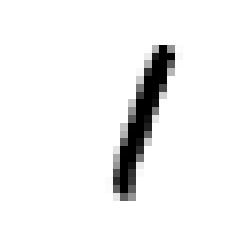

1


In [15]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
plot_digit(try_set)
print(test_label_tr[0][5])

## Verify the result using test set

In [16]:
def ten_digit(data):
    res_prob=[]
    Y_0 ,prob_0=predict (d0["w"], d0["b"], data)
    Y_1 ,prob_1=predict (d1["w"], d1["b"], data)
    Y_2 ,prob_2=predict (d2["w"], d2["b"], data)
    Y_3 ,prob_3=predict (d3["w"], d3["b"], data)
    Y_4 ,prob_4=predict (d4["w"], d4["b"], data)
    Y_5 ,prob_5=predict (d5["w"], d5["b"], data)
    Y_6 ,prob_6=predict (d6["w"], d6["b"], data)
    Y_7 ,prob_7=predict (d7["w"], d7["b"], data)
    Y_8 ,prob_8=predict (d8["w"], d8["b"], data)
    Y_9 ,prob_9=predict (d9["w"], d9["b"], data)
    res_prob.append(prob_0)
    res_prob.append(prob_1)
    res_prob.append(prob_2)
    res_prob.append(prob_3)
    res_prob.append(prob_4)
    res_prob.append(prob_5)
    res_prob.append(prob_6)
    res_prob.append(prob_7)
    res_prob.append(prob_8)
    res_prob.append(prob_9)
    return np.argmax(res_prob)

In [17]:
def get_acc(y_predic,y_origin):
    temp=np.zeros(y_origin.shape[1])
    for i in range(y_origin.shape[1]):
        if y_predic[0][i]==y_origin[0][i]:
            temp[i]=0
        else:
            temp[i]=1
    #print(temp)
    return (100.0 - np.mean(temp*100.0))


In [18]:
res=[]
for i in range(0,test_img_tr.shape[1]):
    res.append(ten_digit(test_img_tr[:,i].reshape(test_img_tr[:,i].shape[0],1)))
pred_test=np.asarray(res).reshape(1,np.asarray(res).shape[0])
print("Accuarcy Test:  ",get_acc(pred_test,test_label_tr))

C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuarcy Test:   9.799999999999997
